In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
#First we will train our model on the "train.csv" file and then we'll test our model on the "test.csv" file.

In [4]:
df=pd.read_table("train.csv",sep=",")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()            #For finding total number of null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
#We will replace the null values in the columns Credit_History, LoanAmount and Loan_Amount_Term with their mean respectively.

In [9]:
df[["Credit_History","LoanAmount","Loan_Amount_Term"]]=si.fit_transform(df[["Credit_History","LoanAmount","Loan_Amount_Term"]])

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [11]:
df.replace("3+",3.,inplace=True)

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [13]:
df["Dependents"]=df["Dependents"].astype("float64")

In [14]:
df.dtypes["Dependents"]

dtype('float64')

In [15]:
#We have converted Dependents column from object type to float type

In [16]:
df[["Dependents"]]=si.fit_transform(df[["Dependents"]])
#We have replaced the null values in Dependents column with the mean 

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
df.drop(["Self_Employed"],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [20]:
#We have dropped the column Self_Employed

In [21]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [23]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<Figure size 800x800 with 0 Axes>

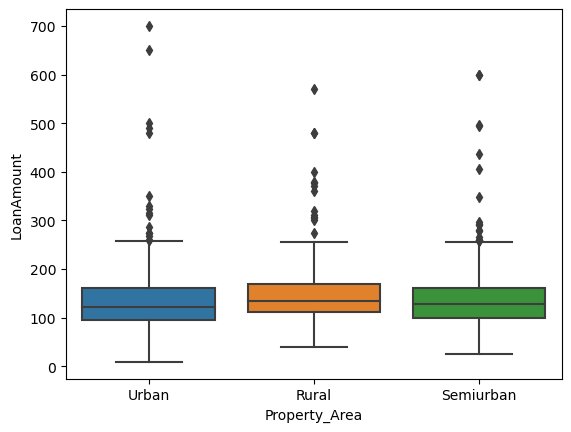

<Figure size 800x800 with 0 Axes>

In [24]:
sns.boxplot(data=df,x="Property_Area",y="LoanAmount")
plt.figure(figsize=(8,8))

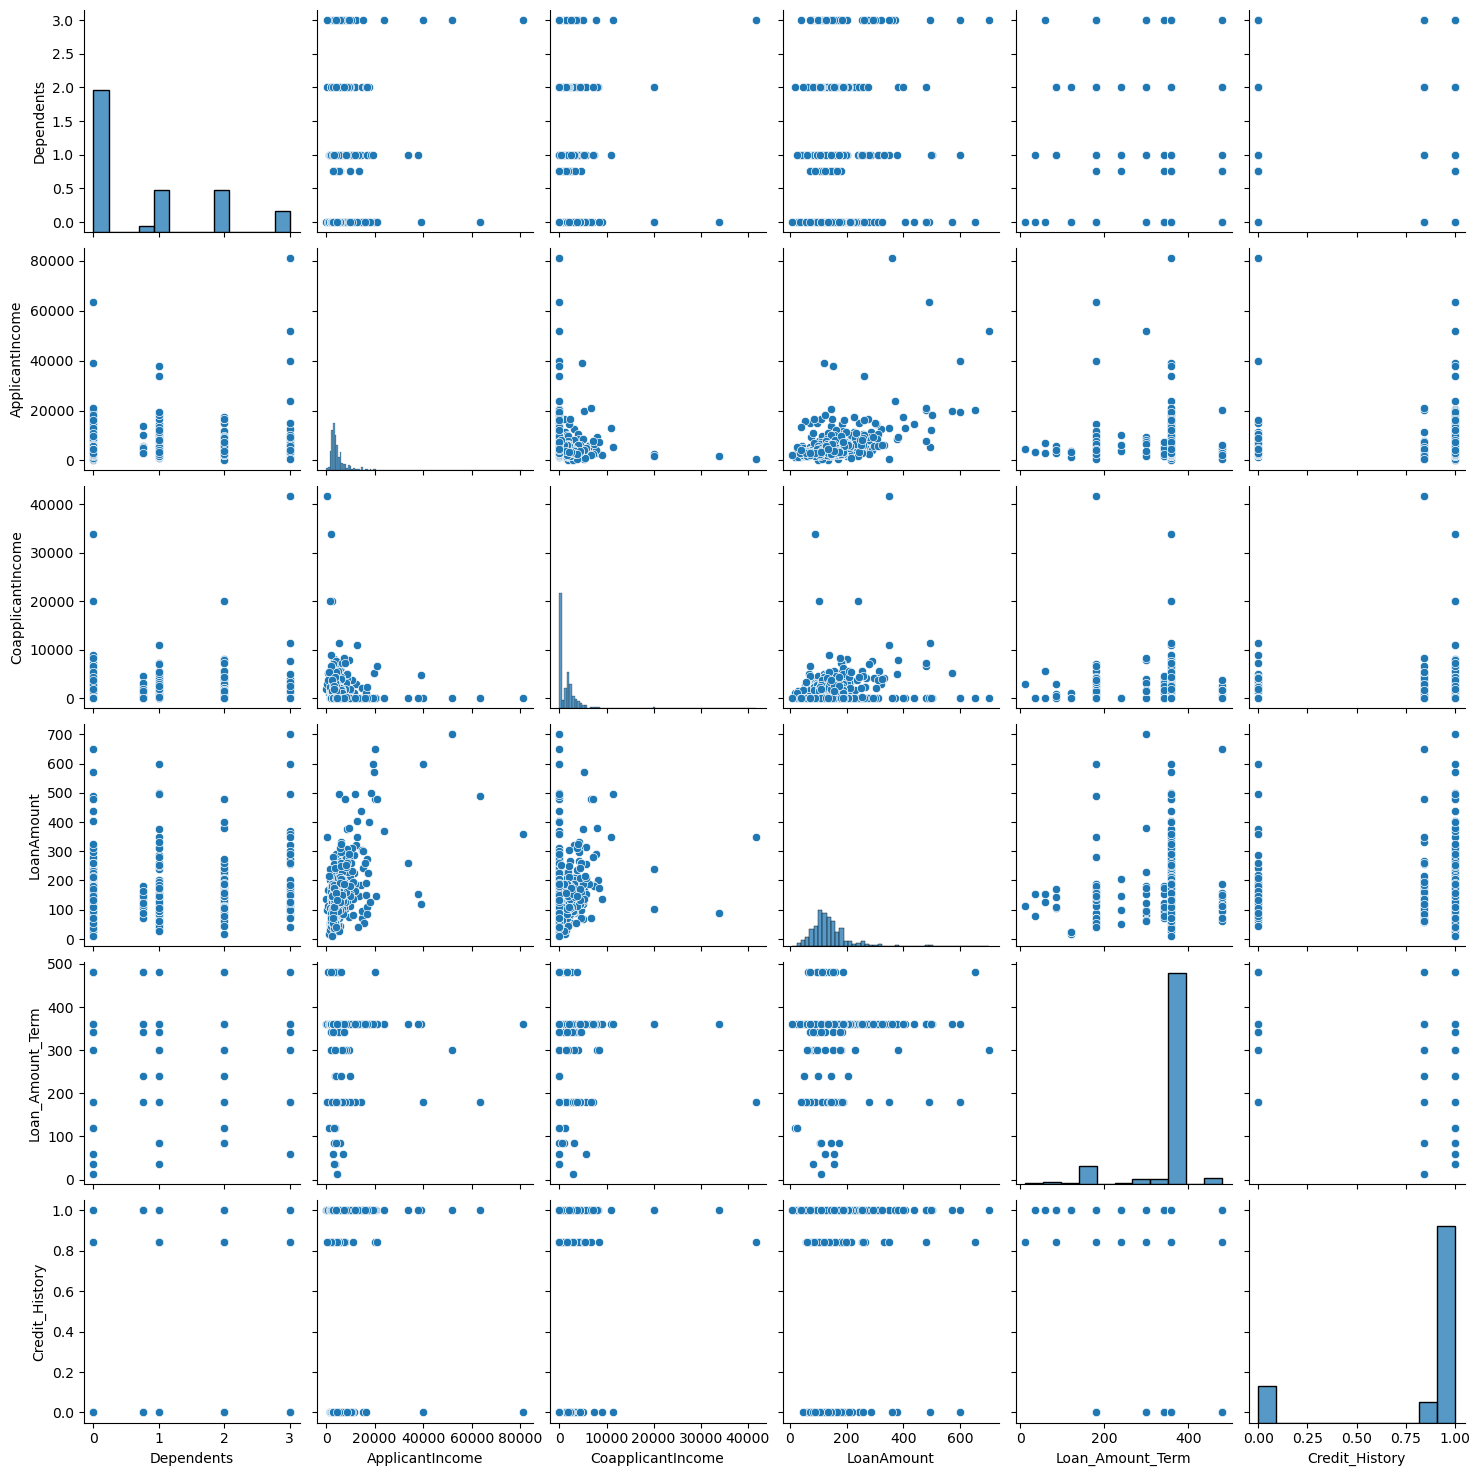

In [25]:
sns.pairplot(df)

In [26]:
df.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001002  Male    No       0.0         Graduate      No             5849             0.0                146.412162  360.0             1.000000        Urban          Y              1
LP002318  Female  No       1.0         Not Graduate  Yes            3867             0.0                62.000000   360.0             1.000000        Semiurban      N              1
LP002301  Female  No       0.0         Graduate      Yes            7441             0.0                194.000000  360.0             1.000000        Rural          N              1
LP002305  Female  No       0.0         Graduate      No             4547             0.0                115.000000  360.0             1.000000        Semiurban      Y              1
LP002308  Male    Yes      0.0         Not Graduate  No             2167             2400.0    

In [27]:
from scipy.stats import skew

In [28]:
df_cat=df.select_dtypes(object)

In [29]:
df_num=df.select_dtypes(["int64","float64"])

In [30]:
df_cat

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [31]:
df_num

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,146.412162,360.0,1.0
1,1.0,4583,1508.0,128.000000,360.0,1.0
2,0.0,3000,0.0,66.000000,360.0,1.0
3,0.0,2583,2358.0,120.000000,360.0,1.0
4,0.0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0
610,3.0,4106,0.0,40.000000,180.0,1.0
611,1.0,8072,240.0,253.000000,360.0,1.0
612,2.0,7583,0.0,187.000000,360.0,1.0


Dependents
0.988341810881527


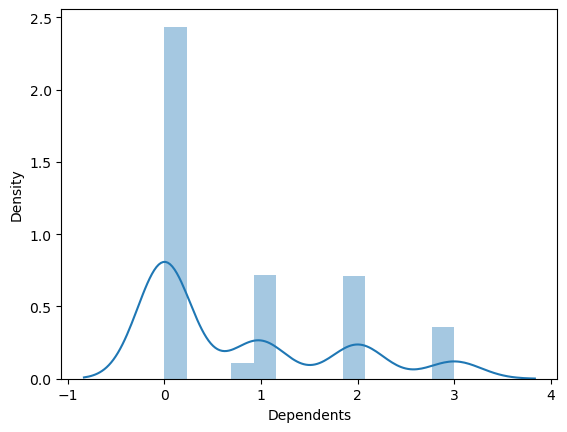

ApplicantIncome
6.523526250899361


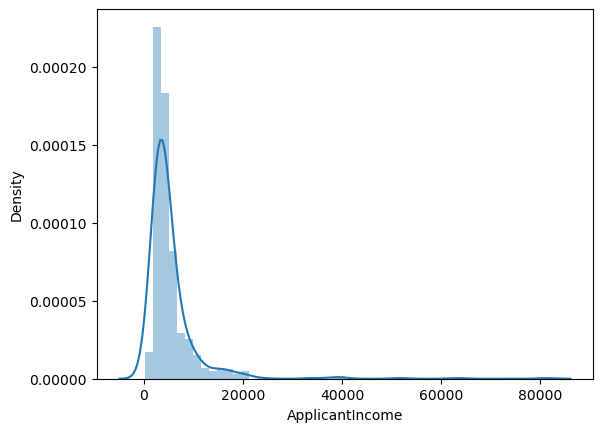

CoapplicantIncome
7.473216996340462


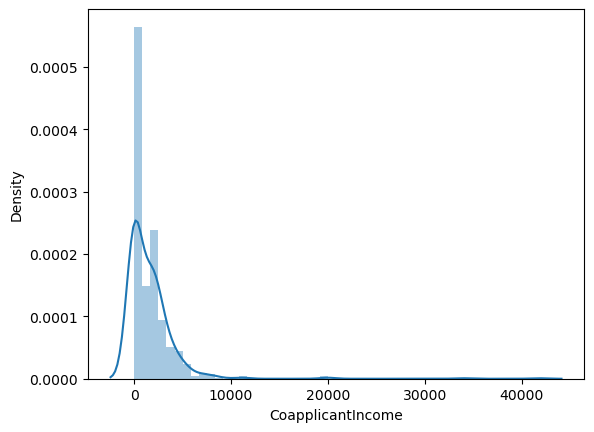

LoanAmount
2.719935540956202


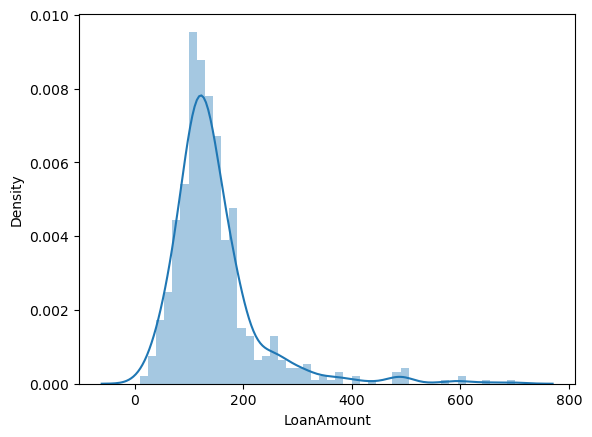

Loan_Amount_Term
-2.3838380001508668


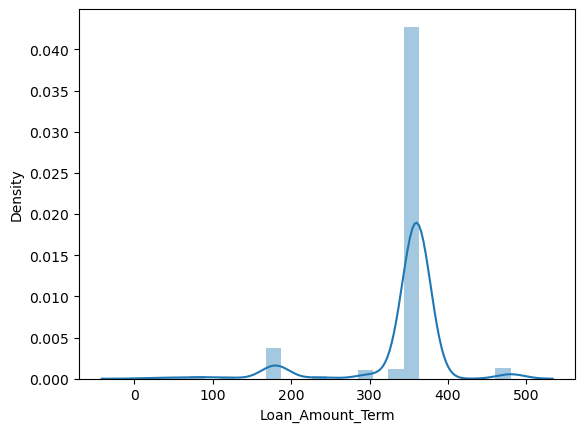

Credit_History
-1.9588001568214484


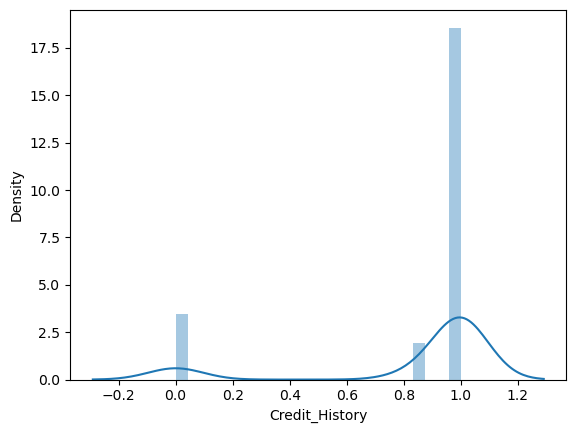

In [32]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [33]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118358,0.027171,0.160767,-0.098048,-0.046995
ApplicantIncome,0.118358,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.027171,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.160767,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.098048,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.046995,-0.014477,-0.001665,-0.007738,0.001395,1.000000


In [34]:
df["LoanAmount"].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [35]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [37]:
df["Gender"].replace("Male",1,inplace=True)
df["Gender"].replace("Female",2,inplace=True)

In [38]:
df["Married"].replace("Yes",1,inplace=True)
df["Married"].replace("No",0,inplace=True)

In [39]:
df["Education"].replace("Graduate",1,inplace=True)
df["Education"].replace("Not Graduate",0,inplace=True)

In [40]:
df["Self_Employed"].replace("Yes",1,inplace=True)
df["Self_Employed"].replace("No",0,inplace=True)

In [41]:
df["Loan_Status"].replace("Y",1,inplace=True)
df["Loan_Status"].replace("N",0,inplace=True)

In [42]:
df["Property_Area"].replace("Urban",1,inplace=True)
df["Property_Area"].replace("Semiurban",2,inplace=True)
df["Property_Area"].replace("Rural",3,inplace=True)

In [43]:
#We have converted the above columns from object types to float and integer types

In [44]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [45]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,614.000000,582.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.186356,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.962541,0.687296
std,0.389718,0.476920,1.002718,0.413389,0.348211,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


In [46]:
df[["Dependents"]]=si.fit_transform(df[["Dependents"]])

In [54]:
df.isna().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df.drop(["Self_Employed"],axis=1,inplace=True)

In [60]:
df.isnull().sum().

Gender               13
Married               3
Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df[["Gender","Married"]]=si.fit_transform(df[["Gender","Married"]])

In [66]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [62]:
features=df.iloc[:,:5]
target=df.iloc[:,5]

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

ValueError: Unknown label type: 'continuous'

In [68]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,1.0,1.0,1,4583,1508.0,128.000000,360.0,1.0,3,0
2,1.0,1.0,0.0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,1.0,0.0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,0.0,0.0,1,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2.0,0.0,0.0,1,2900,0.0,71.000000,360.0,1.0,3,1
610,1.0,1.0,3.0,1,4106,0.0,40.000000,180.0,1.0,3,1
611,1.0,1.0,1.0,1,8072,240.0,253.000000,360.0,1.0,1,1
612,1.0,1.0,2.0,1,7583,0.0,187.000000,360.0,1.0,1,1
